In [329]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import random

img = Image.open('Lenna.png')
gray = img.convert("L")
gray = np.array(gray)
rgb = np.array(img)

In [330]:
# Reference

class kmeans_gray(object):
        
    def __init__(self,K,threshold,gray):
        self.K = K
        self.data = gray
        self.img_x = self.data.shape[0]
        self.img_y = self.data.shape[1]
        self.dis = np.full((self.img_x, self.img_y), np.inf)
        self.threshold = threshold
        
        self.label = np.full((self.img_x, self.img_y),0,int)
        self.centers = np.zeros([self.K],int)
        self.precenters = np.zeros([self.K],int)
        self.loss = 100
        
        
    def init_centers(self):
        for i in range(self.K):
            self.centers[i] = self.data[random.randint(0,self.img_x - 1),random.randint(0,self.img_y - 1)]
            
    def assigment(self):
        label = 0
        for k in range(self.K):
            for i in range(self.img_x):
                for j in range(self.img_y):
                    gray = self.data[i,j]
                    D = abs(int(gray) - int(self.centers[k]))
                    if D < self.dis[i,j]:                            
                        self.dis[i,j] = D
                        self.label[i,j] = label
            label += 1
    
    def update_center(self):
        sumk = np.zeros([self.K],int)
        numk = np.zeros([self.K],int)
        self.precenters = self.centers
        for i in range(self.img_x):
                for j in range(self.img_y):
                    for k in range(self.K):
                        if self.label[i,j] == k:
                            sumk[k] += self.data[i,j]
                            numk[k] += 1
                            break
        self.centers = np.uint8(sumk/numk)
        self.loss = np.sum(abs(self.precenters - self.centers))
    
    def average_gray(self):
        img_arr = np.copy(self.data)
        for i in range(self.img_x):
                for j in range(self.img_y):
                    img_arr[i,j] = self.centers[self.label[i,j]]
        return img_arr      
    
    def run(self):
        self.init_centers()
        while self.loss > self.threshold:
            self.assigment()
            self.update_center()
        grayo = self.average_gray()
        return grayo

In [331]:
# Reference

class kmeans_rgb(object):
        
    def __init__(self,K,threshold,rgb):
        self.K = K
        self.data = rgb
        self.img_x = self.data.shape[0]
        self.img_y = self.data.shape[1]
        self.dis = np.full((self.img_x,self.img_y), np.inf)
        self.threshold = threshold
        
        self.label = np.full((self.img_x, self.img_y),0,int)
        self.centers = np.zeros([self.K,3],int)
        self.precenters = np.zeros([self.K,3],int)
        self.loss = 100
        
        
    def init_centers(self):
        for i in range(self.K):
            _x = random.randint(0,self.img_x - 1)
            _y = random.randint(0,self.img_y - 1)
            for j in range(3):
                self.centers[i,j] = self.data[_x,_y,j]
            
    def assigment(self):
        label = 0
        for k in range(self.K):
            for i in range(self.img_x):
                for j in range(self.img_y):
                    R,G,B = self.data[i,j]
                    Dr = (int(R) - int(self.centers[k,0])) ** 2
                    Dg = (int(G) - int(self.centers[k,1])) ** 2
                    Db = (int(B) - int(self.centers[k,2])) ** 2
                    D = int((Dr + Dg + Db) ** 0.5)
                    if D < self.dis[i,j]:                            
                        self.dis[i,j] = D
                        self.label[i,j] = label
            label += 1
    
    def update_center(self):
        lossk = np.zeros([self.K],int)
        sumk = np.zeros([self.K,3],int)
        numk = np.zeros([self.K,3],int)
        self.precenters = self.centers
        for i in range(self.img_x):
                for j in range(self.img_y):
                    for k in range(self.K):
                        if self.label[i,j] == k:
                            for n in range(3):
                                sumk[k,n] += self.data[i,j,n]
                                numk[k,n] += 1
                            break
        self.centers = np.uint8(sumk/numk)
        for k in range(self.K):
            Dr = (int(self.centers[k,0]) - int(self.precenters[k,0])) ** 2
            Dg = (int(self.centers[k,1]) - int(self.precenters[k,1])) ** 2
            Db = (int(self.centers[k,2]) - int(self.precenters[k,2])) ** 2
            lossk[k] = int((Dr + Dg + Db) ** 0.5)
        self.loss = np.sum(lossk)
    
    def average_rgb(self):
        img_arr = np.copy(self.data)
        for i in range(self.img_x):
                for j in range(self.img_y):
                    for n in range(3):
                        img_arr[i,j,n] = self.centers[self.label[i,j],n]
        return img_arr      
    
    def run(self):
        self.init_centers()
        while self.loss > self.threshold:
            self.assigment()
            self.update_center()
        grayo = self.average_rgb()
        return grayo

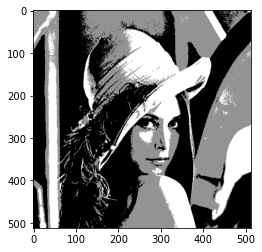

In [332]:
testclass = kmeans_gray(3,2,gray)
plt.imshow(testclass.run(),'gray')

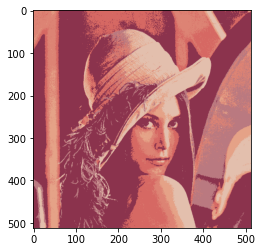

In [333]:
testclass = kmeans_rgb(6,6,rgb)
plt.imshow(testclass.run())

In [334]:
img.close()